Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points). Be sure to review the readings before you start on this assignment. Calculate the sum of least square error for each different values of 'k'. Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points) . Finally plot the optimal clusters with their centroids along with a brief explanation (50 points). Comment your code as needed.

In [2]:
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

In [3]:
os.environ["OMP_NUM_THREADS"] = "3" #problem with sci kit learn and this is what the error message told me to do, so

In [4]:
# fetch dataset 
#the datasets provided all had very few numerical variables, and since I wanted to work with cancer data, I found this dataset from the same repository to use instead. Hopefully that is fine!
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# import data (as pandas dataframes) 
x = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

df = pd.concat([x, y], axis=1) #merge together to a single df
df.head(4)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M


In [45]:
df.shape

(569, 31)

In [5]:
df = df.dropna() #kmeans requires no missing variables
df_numeric = df.select_dtypes(include = 'number') #kmeans requires numerica data

df_numeric.shape

(569, 30)

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric) #need to normalize data because k-means is sensitive to scale 
df_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

C:\Users\u1584280\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\u1584280\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\u1584280\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\u1584280\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

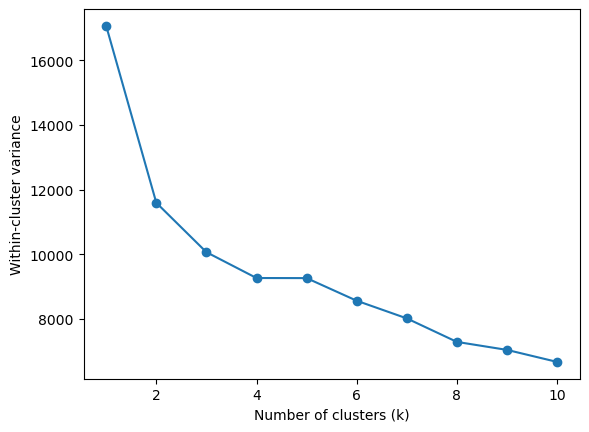

In [7]:
inertia = []
K = range(1,11) #most datasets don't have more than ten clusters so we do this kind of arbitrarily

for k in K: #looking at within-cluster variance for every possible option of k between 1-10
    km = KMeans(n_clusters = k, random_state = 42) #random_state variable required to be the same across code to control randomness
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker = 'o') #create the elbow graph for us to do the elbow method
plt.xlabel('Number of clusters (k)')
plt.ylabel ('Within-cluster variance')

plt.show()
#the bend could be either 2 or 3...we'll call it 3

In [8]:
kmeans = KMeans(n_clusters =3, random_state = 42) #run k-means clustering w/three clusters, we have to set a starting number (in this case 42) to fix the randomness and make sure it initializes kmeans clustering from the same point every time
labels = kmeans.fit_predict(df_scaled)

df_numeric['cluster'] = labels
df_numeric['cluster'].value_counts() #check to see how many items are in each cluster 

C:\Users\u1584280\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


cluster
2    354
1    118
0     97
Name: count, dtype: int64

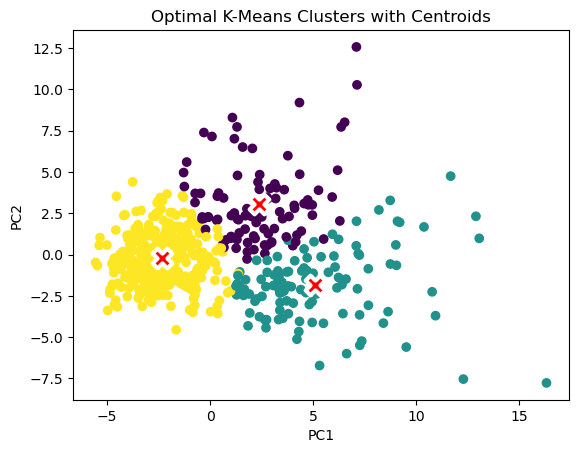

In [13]:
#create a visualization of the clusters using principle component analysis
pca = PCA(n_components=3) #fit the PCA
X_pca = pca.fit_transform(df_scaled)

centroids_pca = pca.transform(kmeans.cluster_centers_) # Transform centroids

#plot the clusters
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)

# plot the centroids
plt.scatter(
    centroids_pca[:,0], 
    centroids_pca[:,1], 
    c="red", #big clear centroid markers
    s=200, 
    marker="X", 
    edgecolor="white", 
    linewidth= 3
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Optimal K-Means Clusters with Centroids")


plt.show()